# Question 2

In [1]:
# Import library 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel(r'D:\Cdac\Module exam\Module 7 exam\Exam_dataset\data_final.xlsx')

In [3]:
# data Exploration

In [4]:
# Top values
df.head()

,observation,feature,price
0,0.44,0.68,511.14
1,0.99,0.23,717.10
2,0.84,0.29,607.91
3,0.28,0.45,270.40
4,0.07,0.83,289.88


In [5]:
# basic info about data type and rows
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   observation  100 non-null    float64
 1   feature      100 non-null    float64
 2   price        100 non-null    float64
dtypes: float64(3)
memory usage: 2.5 KB


In [27]:
# Only numerical data types is present in the above dataframe

In [6]:
#Checking the shape of dataframe
df.shape

(100, 3)

In [7]:
# Description about the all columns
df.describe(include='all')

,observation,feature,price
count,100.000000,100.000000,100.000000
mean,0.550300,0.501700,554.214600
std,0.293841,0.307124,347.312796
min,0.010000,0.000000,42.080000
25%,0.300000,0.230000,278.172500
50%,0.570000,0.485000,514.285000
75%,0.822500,0.760000,751.752500
max,1.000000,0.990000,1563.820000


In [8]:
# Data Preprocessing and cleaning

In [9]:
#Checking null values
df.isna().sum()

observation    0
feature        0
price          0
dtype: int64

In [10]:
# Checking null values in data set
df.duplicated().sum()

0

In [11]:
df.corr() # checking correlation

,observation,feature,price
observation,1.000000,0.041766,0.764315
feature,0.041766,1.000000,0.627476
price,0.764315,0.627476,1.000000


<AxesSubplot: >

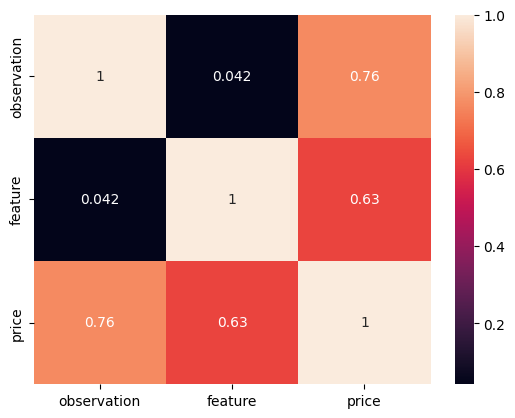

In [12]:
sns.heatmap(df.corr(),annot=True) # Heatmap for the dataframe

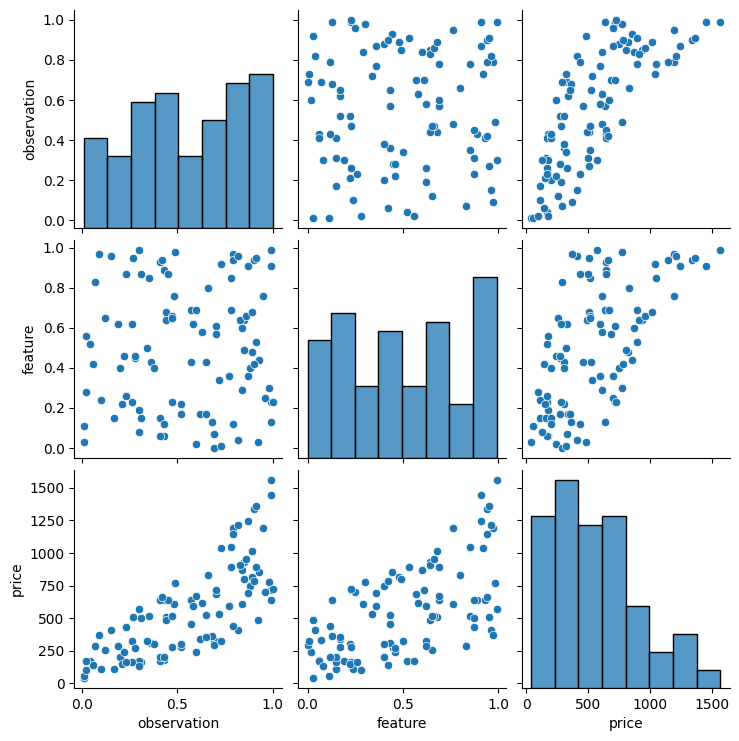

In [13]:
sns.pairplot(df) # It is clearly visible classifier variable are dependent on independent variable non-linearly or polynomialy
plt.show()

In [14]:
# Separting dependent and independent variable
x=df.iloc[:,:-1] #independent variable
x

,observation,feature
0,0.44,0.68
1,0.99,0.23
2,0.84,0.29
3,0.28,0.45
4,0.07,0.83
...,...,...
95,0.99,0.13
96,0.28,0.46
97,0.87,0.36
98,0.23,0.87


In [15]:
y=df.iloc[:,-1] #dependent variable
y

0     511.14
1     717.10
2     607.91
3     270.40
4     289.88
       ...  
95    636.22
96    272.12
97    696.65
98    434.53
99    593.86
Name: price, Length: 100, dtype: float64

In [16]:
# Splitting data into traing and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [17]:
# Multiple Linear Regression Model 
from sklearn.linear_model import LinearRegression
model1=LinearRegression()
model1.fit(x_train,y_train)

LinearRegression()

In [18]:
#Predicted value for linear model
y_pred_l=model1.predict(x_test)
y_pred_l

array([ 426.09146539,   58.82595194,  671.86958179,   70.59925474,
        655.72394234,  237.66554823,  588.89726222,  571.74180841,
        677.2517328 ,  698.94769006,  751.25407187,  971.69207474,
       1054.21622072, 1151.03617141,  526.05107197,  399.51785749,
        986.38053984,  118.5888131 ,  890.9059235 ,  704.55433467])

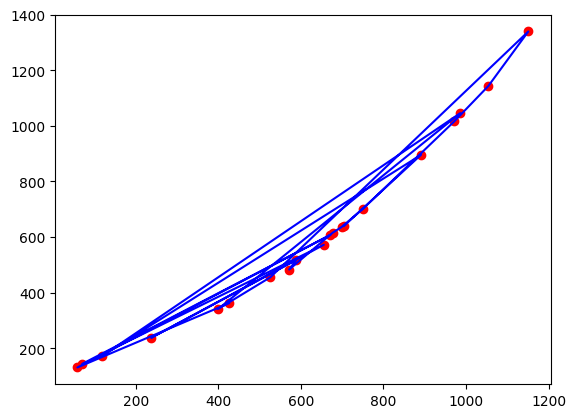

In [19]:
#Plotting line for testing data using linear regression model
plt.scatter(y_pred_l,y_test,color='red')
plt.plot(y_pred_l,y_test,color='blue')
plt.show()

In [20]:
model1.predict([[0.41,0.21]]) # predicting price

C:\Users\avira\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([240.91704412])

In [21]:
# calculating Mean Squared error
from sklearn import metrics
metrics.mean_squared_error(y_test,y_pred_l)


5662.710743101953

In [22]:
#Summary for linear model
import statsmodels.api as sm
x_stats=sm.add_constant(x_train)
summ=sm.OLS(y_train,x_stats).fit()
summ.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     567.9
Date:                Mon, 23 Jan 2023   Prob (F-statistic):           8.03e-47
Time:                        17:36:42   Log-Likelihood:                -471.29
No. Observations:                  80   AIC:                             948.6
Df Residuals:                      77   BIC:                             955.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -257.7030     25.766    -10.002      0.000    -309.009    -206.397
observation   880.1814     34.631     25.416      0.000     811.223     949.140
feature       655.9319     32.754     20.026      0.000     590.709     721.154
==============================================================================
Omnibus:                       30.682   Durbin-Watson:                   1.784
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.370
Skew:                           1.601   Prob(JB):                     1.90e-11
Kurtosis:                       5.136   Cond. No.                         5.13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
# Polynomial Model :
from sklearn.preprocessing import PolynomialFeatures
polynomial=PolynomialFeatures(degree=3)
poly=polynomial.fit_transform(x_train)
lg1=LinearRegression()
lg1.fit(poly,y_train)


LinearRegression()

In [24]:
#predicting value using polynomial model
y_pred2=lg1.predict(polynomial.fit_transform(x_test))
y_pred2

array([ 359.50360287,  131.23834372,  609.16930978,  149.98412841,
        566.72101623,  237.76303341,  520.60934004,  485.30770519,
        619.83089854,  632.50577664,  703.21376307, 1024.98728581,
       1151.24558258, 1330.85054638,  460.70580041,  340.84136488,
       1041.64246977,  170.75998438,  901.57838952,  636.04094675])

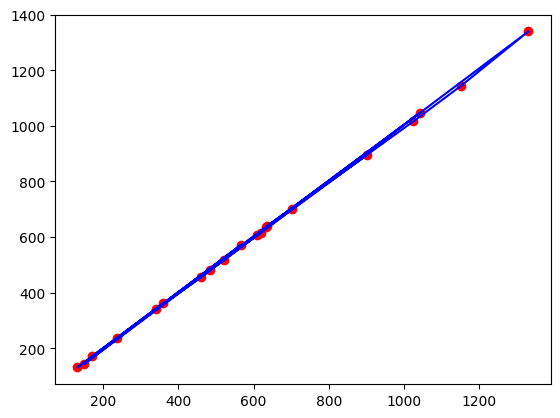

In [25]:
# Plotting regression line using polynomial regression model
plt.scatter(y_pred2,y_test,color='red')
plt.plot(y_pred2,y_test,color='blue')
plt.show()

In [26]:
# calculating Mean Squared error
from sklearn import metrics
metrics.mean_squared_error(y_test,y_pred2)


22.241818750636856

Observation :
- As we can see that linear regression model doesnot fit that much as compared to polynomial model from the two plotted graph
- Also the accuracy for polynomial model is high as compared to linear model as it's mse is low .
- so, For this dataset ,Polynomial model is suitable.